In [1]:
import pandas as pd
import numpy as np
import acquire
import acquire_rm
import explore
# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
import acquire
# Modeling
from sklearn.cluster import KMeans


In [2]:
#acquiring nba data
df = acquire.tome_prep()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84164 entries, 0 to 94709
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        84164 non-null  object 
 1   player_id     84164 non-null  int64  
 2   team          84164 non-null  object 
 3   team_id       84164 non-null  int64  
 4   game_id       84164 non-null  int64  
 5   home          84164 non-null  bool   
 6   period        84164 non-null  int64  
 7   abs_time      84164 non-null  int64  
 8   play_time     84164 non-null  float64
 9   since_rest    84164 non-null  float64
 10  loc_x         84164 non-null  int64  
 11  loc_y         84164 non-null  int64  
 12  zone          84164 non-null  object 
 13  shot_type     84164 non-null  object 
 14  score_margin  84164 non-null  int64  
 15  points        84164 non-null  int64  
 16  fg_pct        84164 non-null  float64
 17  shot_result   84164 non-null  object 
dtypes: bool(1), float64(3), in

In [4]:
df.head()

,player,player_id,team,team_id,game_id,home,period,abs_time,play_time,since_rest,loc_x,loc_y,zone,shot_type,score_margin,points,fg_pct,shot_result
0,Bogdan Bogdanovic,203992,Atlanta Hawks,1610612737,22100014,True,1,226,226.0,226.0,228,64,R Below Break/Corner,Jump Shot,-3,3,1.00,Made Shot
1,Bogdan Bogdanovic,203992,Atlanta Hawks,1610612737,22100014,True,1,253,253.0,253.0,91,232,R Above Break,Jump Shot,0,6,1.00,Made Shot
2,Bogdan Bogdanovic,203992,Atlanta Hawks,1610612737,22100014,True,3,1580,867.0,140.0,228,69,R Below Break/Corner,Jump Shot,11,9,0.67,Made Shot
3,Bogdan Bogdanovic,203992,Atlanta Hawks,1610612737,22100014,True,3,1896,1183.0,456.0,134,210,R Above Break,Jump Shot,18,9,0.75,Missed Shot
4,Bogdan Bogdanovic,203992,Atlanta Hawks,1610612737,22100014,True,4,2411,1308.0,19.0,-148,203,Center,Jump Shot,23,9,0.50,Missed Shot


In [5]:
df_players = df.groupby(["player"])

In [6]:
df_players.head()

,player,player_id,team,team_id,game_id,home,period,abs_time,play_time,since_rest,loc_x,loc_y,zone,shot_type,score_margin,points,fg_pct,shot_result
0,Bogdan Bogdanovic,203992,Atlanta Hawks,1610612737,22100014,True,1,226,226.0,226.0,228,64,R Below Break/Corner,Jump Shot,-3,3,1.00,Made Shot
1,Bogdan Bogdanovic,203992,Atlanta Hawks,1610612737,22100014,True,1,253,253.0,253.0,91,232,R Above Break,Jump Shot,0,6,1.00,Made Shot
2,Bogdan Bogdanovic,203992,Atlanta Hawks,1610612737,22100014,True,3,1580,867.0,140.0,228,69,R Below Break/Corner,Jump Shot,11,9,0.67,Made Shot
3,Bogdan Bogdanovic,203992,Atlanta Hawks,1610612737,22100014,True,3,1896,1183.0,456.0,134,210,R Above Break,Jump Shot,18,9,0.75,Missed Shot
4,Bogdan Bogdanovic,203992,Atlanta Hawks,1610612737,22100014,True,4,2411,1308.0,19.0,-148,203,Center,Jump Shot,23,9,0.50,Missed Shot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94024,Terry Rozier,1626179,Charlotte Hornets,1610612766,22100017,False,1,258,258.0,258.0,168,197,L Below Break/Corner,Pullup Jump shot,-1,0,1.00,Missed Shot
94025,Terry Rozier,1626179,Charlotte Hornets,1610612766,22100017,False,2,1139,694.0,162.0,126,219,R Above Break,Jump Shot,-8,0,0.00,Missed Shot
94026,Terry Rozier,1626179,Charlotte Hornets,1610612766,22100090,True,1,158,158.0,158.0,-235,-4,R Center,Jump Shot,-1,3,1.00,Made Shot
94027,Terry Rozier,1626179,Charlotte Hornets,1610612766,22100090,True,1,180,180.0,180.0,-229,18,R Center,Jump Shot,-1,3,1.00,Missed Shot


In [7]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df.select_dtypes(include=numerics)
newdf.head()

,player_id,team_id,game_id,period,abs_time,play_time,since_rest,loc_x,loc_y,score_margin,points,fg_pct
0,203992,1610612737,22100014,1,226,226.0,226.0,228,64,-3,3,1.00
1,203992,1610612737,22100014,1,253,253.0,253.0,91,232,0,6,1.00
2,203992,1610612737,22100014,3,1580,867.0,140.0,228,69,11,9,0.67
3,203992,1610612737,22100014,3,1896,1183.0,456.0,134,210,18,9,0.75
4,203992,1610612737,22100014,4,2411,1308.0,19.0,-148,203,23,9,0.50


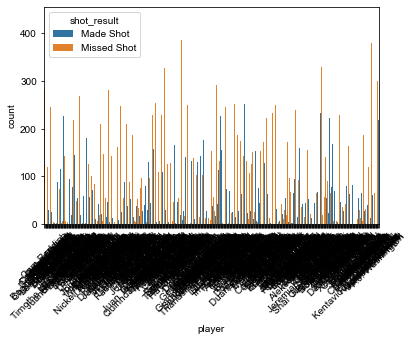

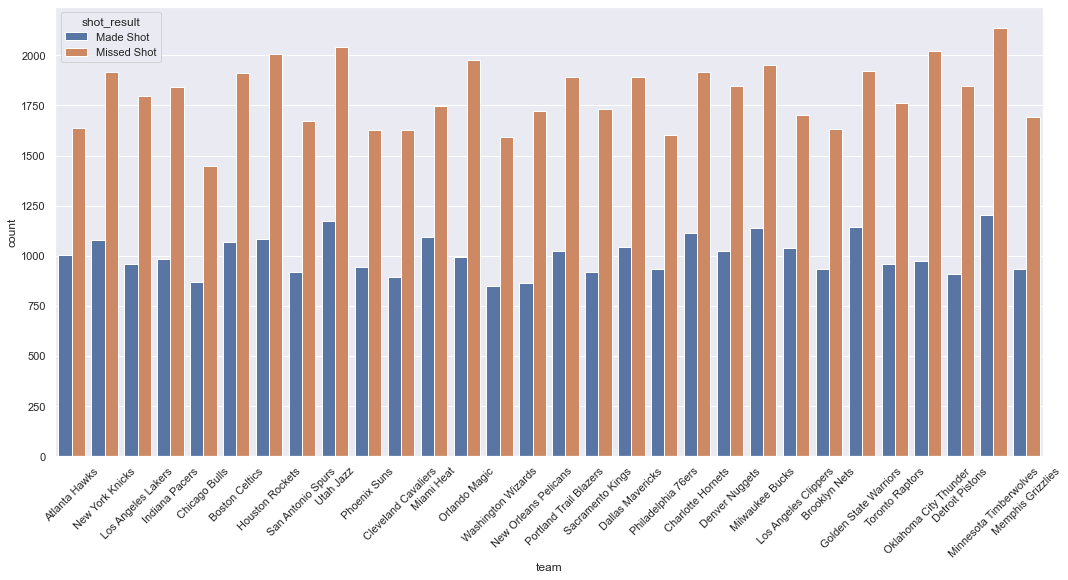

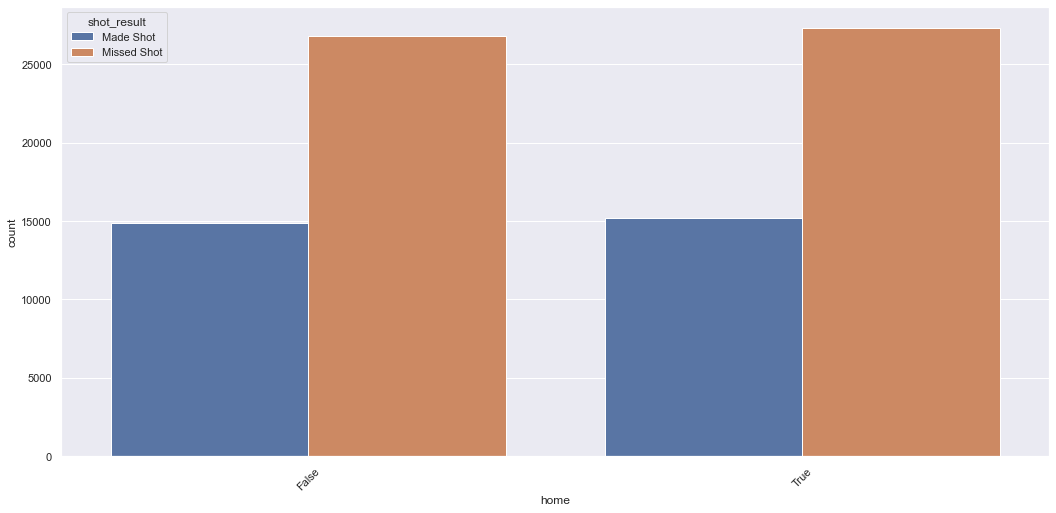

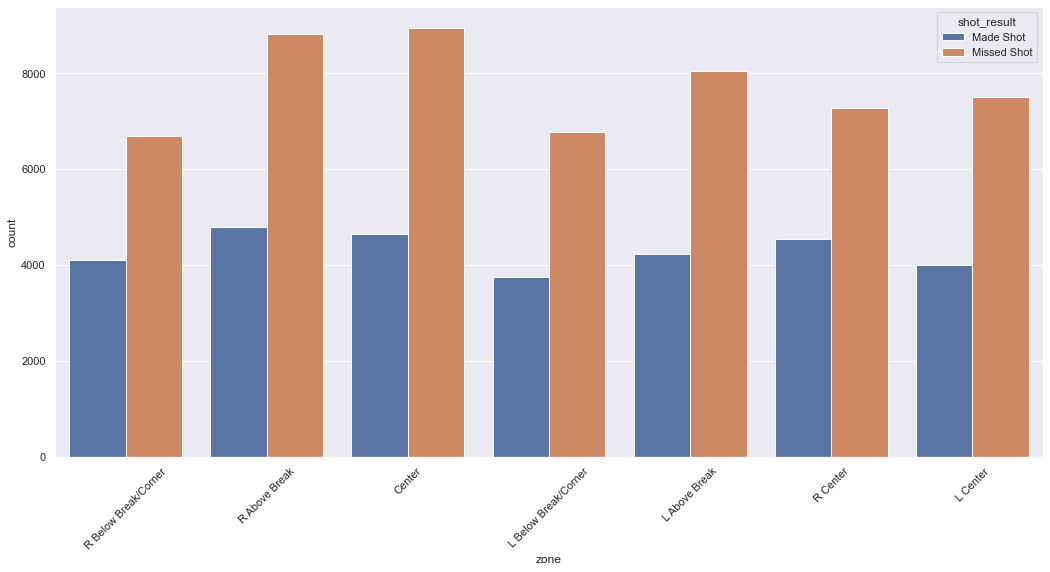

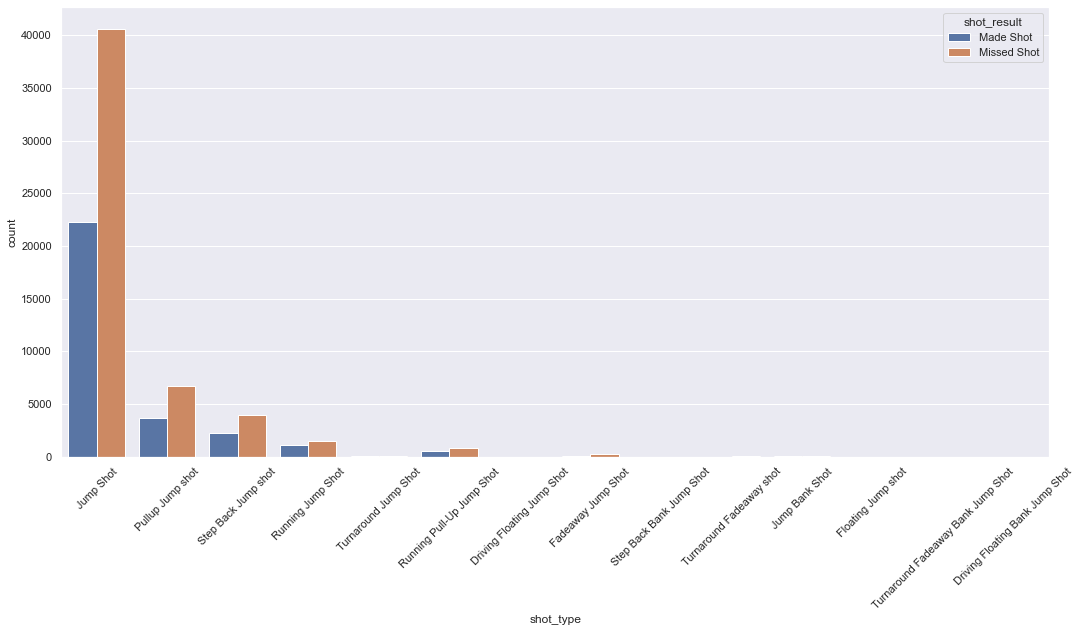

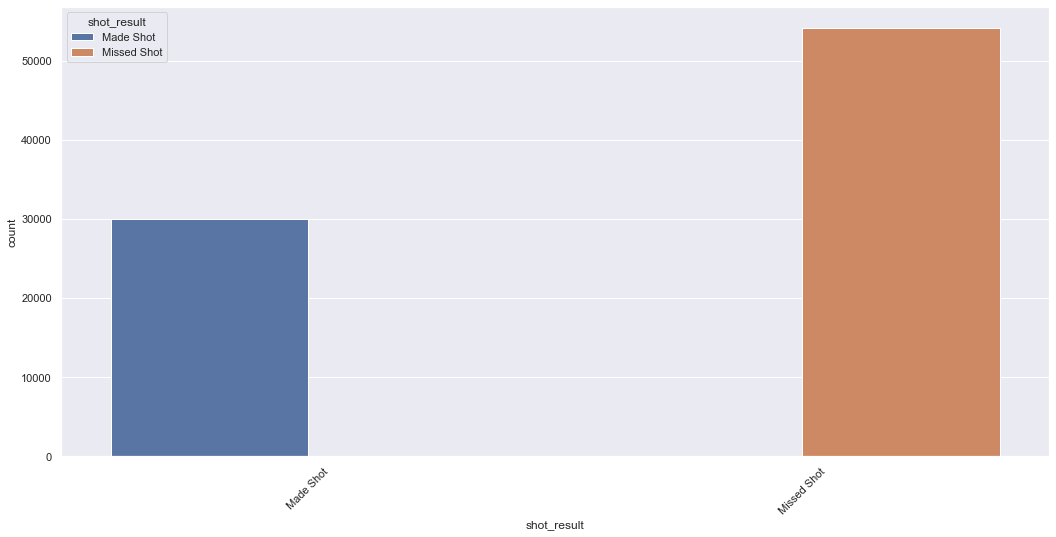

In [8]:
for i, predictor in enumerate(df.drop(columns = newdf.columns )):
    plt.figure(i)
    plot= sns.countplot(data=df, x=predictor, hue='shot_result')
    sns.set(rc={'figure.figsize':(17.7,8.27)})
    plt.setp(plot.get_xticklabels(), rotation=45) 

In [9]:
# for i, predictor in enumerate(df_players(columns = newdf.columns )):
#     plt.figure(i)
#     plot= sns.countplot(data=df, x=predictor, hue='shot_result')
#     sns.set(rc={'figure.figsize':(17.7,8.27)})
#     plt.setp(plot.get_xticklabels(), rotation=45)

<Figure size 1274.4x595.44 with 0 Axes>

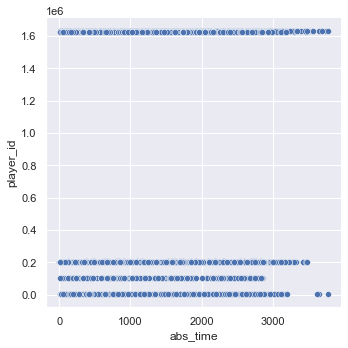

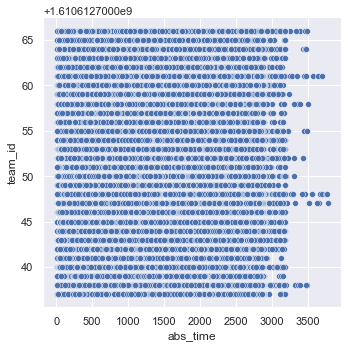

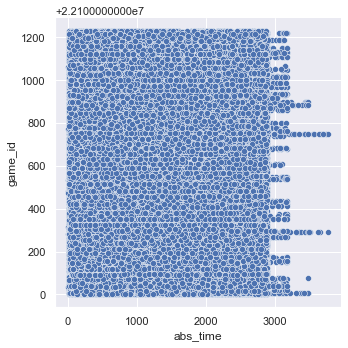

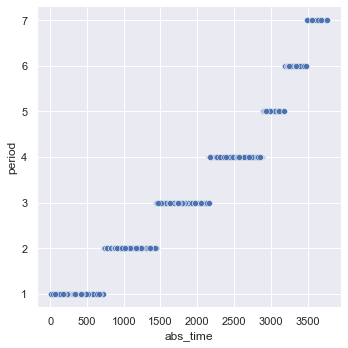

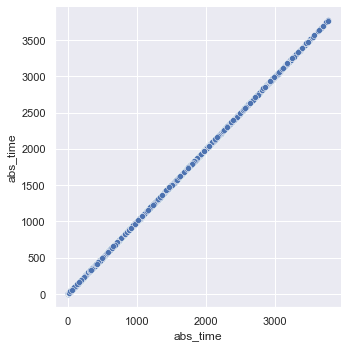

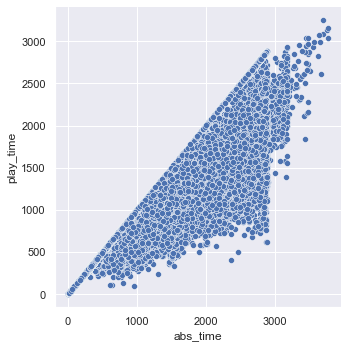

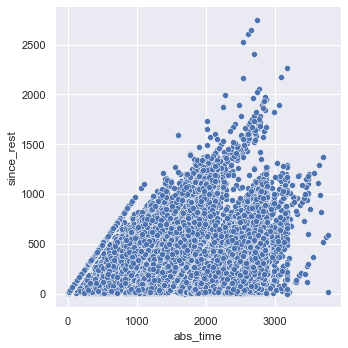

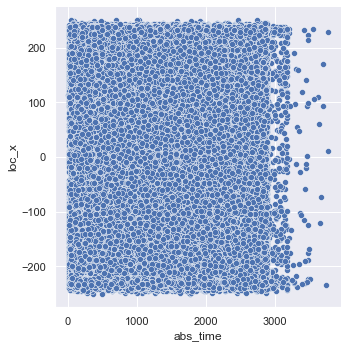

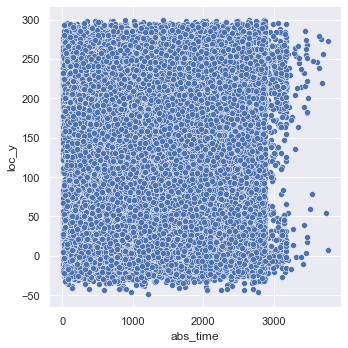

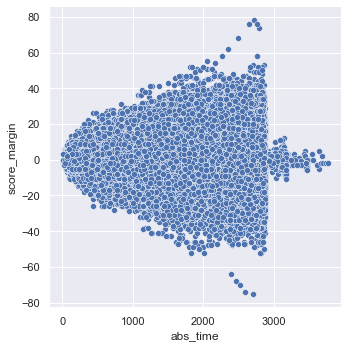

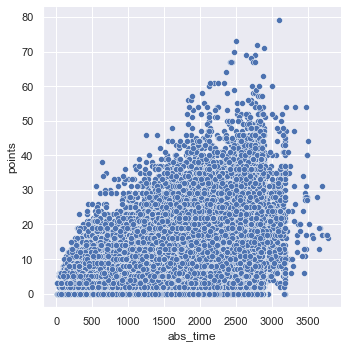

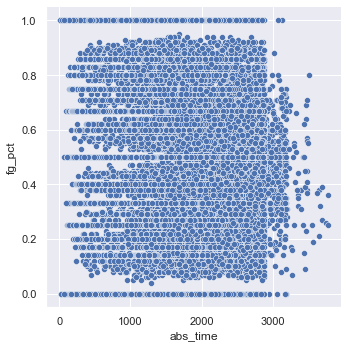

In [10]:
for i, predictor in enumerate(df.select_dtypes(include= numerics)):
    plt.figure(i)
    plot= sns.relplot(data=newdf, y=predictor, x='abs_time')
    sns.set(rc={'figure.figsize':(17.7,8.27)})

#     plt.setp(plot.get_xticklabels(), rotation=45)

In [11]:
df_main = pd.read_csv("3pt_maindf.csv")
df_main.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,22100001,7,1628960,Grayson Allen,1610612749,Milwaukee Bucks,1,11,42,...,Left Side Center(LC),24+ ft.,26,-164,210,1,0,20211019,MIL,BKN
1,Shot Chart Detail,22100001,15,203507,Giannis Antetokounmpo,1610612749,Milwaukee Bucks,1,11,13,...,Center(C),24+ ft.,26,0,263,1,0,20211019,MIL,BKN
2,Shot Chart Detail,22100001,25,201935,James Harden,1610612751,Brooklyn Nets,1,10,16,...,Left Side Center(LC),24+ ft.,27,-213,172,1,0,20211019,MIL,BKN
3,Shot Chart Detail,22100001,27,201572,Brook Lopez,1610612749,Milwaukee Bucks,1,10,3,...,Center(C),24+ ft.,28,23,282,1,1,20211019,MIL,BKN
4,Shot Chart Detail,22100001,43,203114,Khris Middleton,1610612749,Milwaukee Bucks,1,8,52,...,Center(C),24+ ft.,26,-54,261,1,1,20211019,MIL,BKN


In [12]:
# df_main

In [13]:
df_main.columns = df_main.columns.str.lower()

In [14]:
df_gb = df_main.groupby(["player_name", "game_id"]).agg({"shot_attempted_flag":["sum"],"shot_made_flag":["sum"]})
# grouped_multiple = df.groupby(['Team', 'Pos']).agg({'Age': ['mean', 'min', 'max']})
df_gb["shot_pct"] = df_gb.shot_made_flag/df_gb.shot_attempted_flag

<AxesSubplot:xlabel='player_name,game_id'>

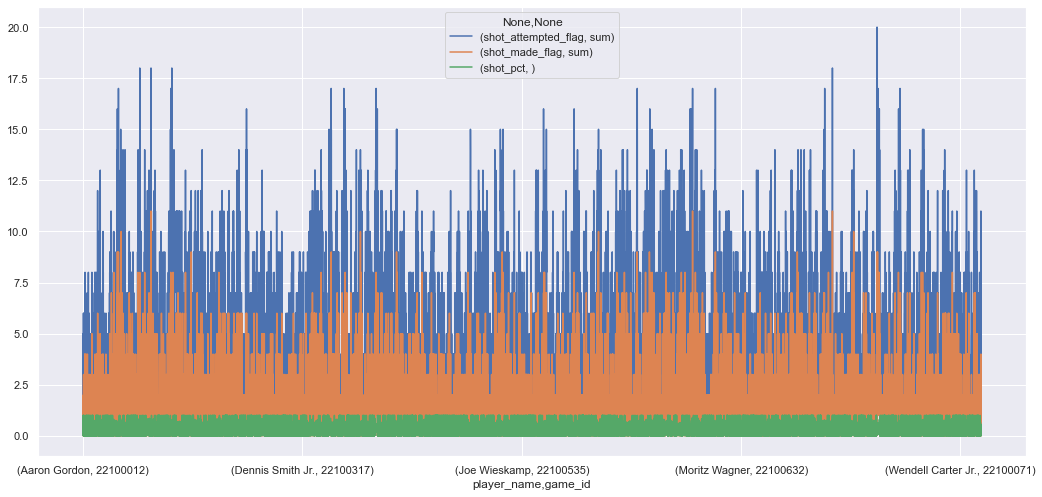

In [15]:
df_gb.plot()

In [16]:
df_gb.max()

shot_attempted_flag  sum    20.0
shot_made_flag       sum    11.0
shot_pct                     1.0
dtype: float64

In [17]:
df_main.head()

,grid_type,game_id,game_event_id,player_id,player_name,team_id,team_name,period,minutes_remaining,seconds_remaining,...,shot_zone_area,shot_zone_range,shot_distance,loc_x,loc_y,shot_attempted_flag,shot_made_flag,game_date,htm,vtm
0,Shot Chart Detail,22100001,7,1628960,Grayson Allen,1610612749,Milwaukee Bucks,1,11,42,...,Left Side Center(LC),24+ ft.,26,-164,210,1,0,20211019,MIL,BKN
1,Shot Chart Detail,22100001,15,203507,Giannis Antetokounmpo,1610612749,Milwaukee Bucks,1,11,13,...,Center(C),24+ ft.,26,0,263,1,0,20211019,MIL,BKN
2,Shot Chart Detail,22100001,25,201935,James Harden,1610612751,Brooklyn Nets,1,10,16,...,Left Side Center(LC),24+ ft.,27,-213,172,1,0,20211019,MIL,BKN
3,Shot Chart Detail,22100001,27,201572,Brook Lopez,1610612749,Milwaukee Bucks,1,10,3,...,Center(C),24+ ft.,28,23,282,1,1,20211019,MIL,BKN
4,Shot Chart Detail,22100001,43,203114,Khris Middleton,1610612749,Milwaukee Bucks,1,8,52,...,Center(C),24+ ft.,26,-54,261,1,1,20211019,MIL,BKN


In [18]:
df_trial = df_main.groupby(["player_name"])

In [19]:
# df_trial.head()

In [20]:
df.head()

,player,player_id,team,team_id,game_id,home,period,abs_time,play_time,since_rest,loc_x,loc_y,zone,shot_type,score_margin,points,fg_pct,shot_result
0,Bogdan Bogdanovic,203992,Atlanta Hawks,1610612737,22100014,True,1,226,226.0,226.0,228,64,R Below Break/Corner,Jump Shot,-3,3,1.00,Made Shot
1,Bogdan Bogdanovic,203992,Atlanta Hawks,1610612737,22100014,True,1,253,253.0,253.0,91,232,R Above Break,Jump Shot,0,6,1.00,Made Shot
2,Bogdan Bogdanovic,203992,Atlanta Hawks,1610612737,22100014,True,3,1580,867.0,140.0,228,69,R Below Break/Corner,Jump Shot,11,9,0.67,Made Shot
3,Bogdan Bogdanovic,203992,Atlanta Hawks,1610612737,22100014,True,3,1896,1183.0,456.0,134,210,R Above Break,Jump Shot,18,9,0.75,Missed Shot
4,Bogdan Bogdanovic,203992,Atlanta Hawks,1610612737,22100014,True,4,2411,1308.0,19.0,-148,203,Center,Jump Shot,23,9,0.50,Missed Shot


In [21]:
# X= df[["play_time"]]
# # def cluster_features(df, k):
# kmeans = KMeans(n_clusters =4, random_state=347)

# #group1 = train_scaled[['age','price_bath','taxvaluedollarcnt_zone','taxvaluedollarcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet','price_sqft']]
# kmeans.fit(X)
# kmeans.predict(X)
# train_scaled['regional_prices_clusters'] = kmeans.predict(X)
# plt.figure(figsize=(10, 6))
# plt.axvline(x=0.5, color='k', linestyle='--')
# sns.scatterplot(x = 'logerror', y = 'taxvaluedollarcnt_zone', data = train_scaled, hue = 'regional_prices_clusters')

<Figure size 1274.4x595.44 with 0 Axes>

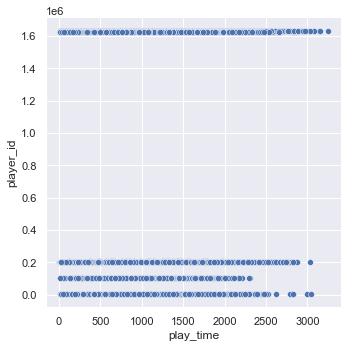

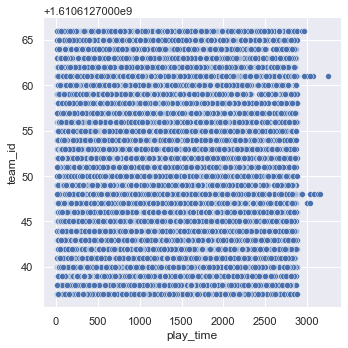

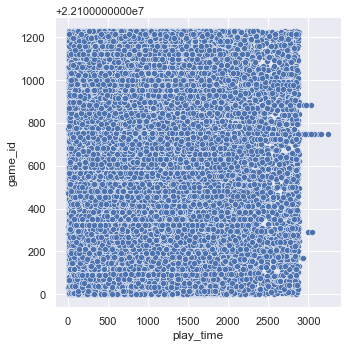

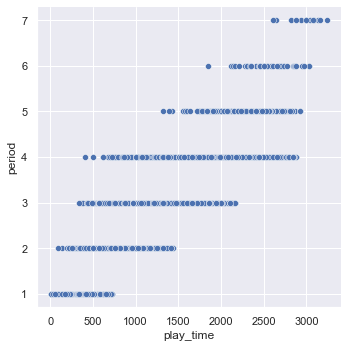

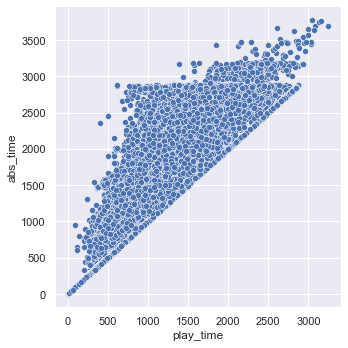

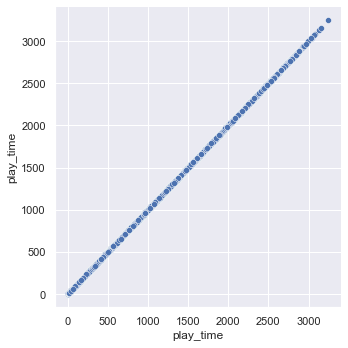

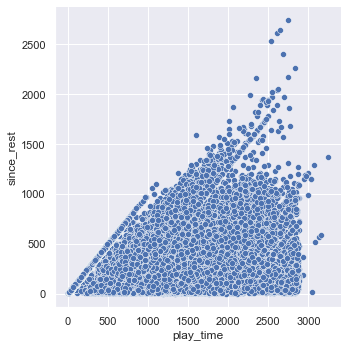

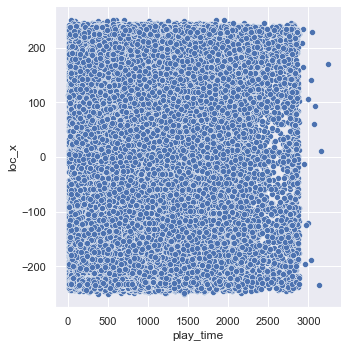

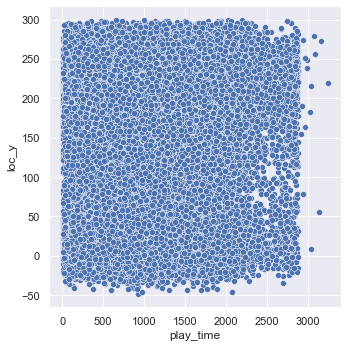

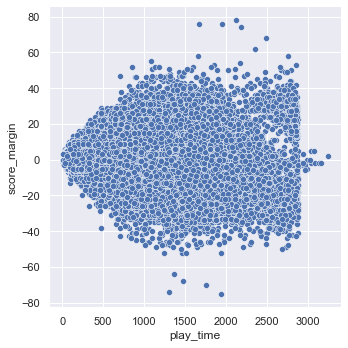

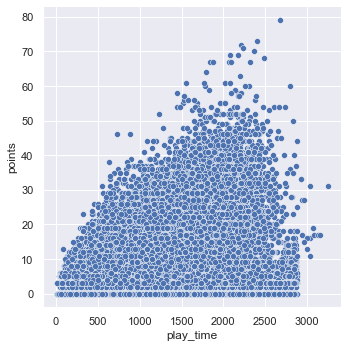

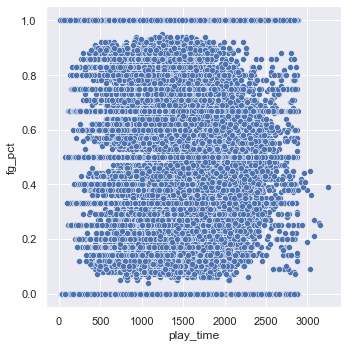

In [22]:
for i, predictor in enumerate(df.select_dtypes(include= numerics)):
    plt.figure(i)
    plot= sns.relplot(data=df, y=predictor, x='play_time')

In [23]:
df.head(10)

,player,player_id,team,team_id,game_id,home,period,abs_time,play_time,since_rest,loc_x,loc_y,zone,shot_type,score_margin,points,fg_pct,shot_result
0,Bogdan Bogdanovic,203992,Atlanta Hawks,1610612737,22100014,True,1,226,226.0,226.0,228,64,R Below Break/Corner,Jump Shot,-3,3,1.00,Made Shot
1,Bogdan Bogdanovic,203992,Atlanta Hawks,1610612737,22100014,True,1,253,253.0,253.0,91,232,R Above Break,Jump Shot,0,6,1.00,Made Shot
2,Bogdan Bogdanovic,203992,Atlanta Hawks,1610612737,22100014,True,3,1580,867.0,140.0,228,69,R Below Break/Corner,Jump Shot,11,9,0.67,Made Shot
3,Bogdan Bogdanovic,203992,Atlanta Hawks,1610612737,22100014,True,3,1896,1183.0,456.0,134,210,R Above Break,Jump Shot,18,9,0.75,Missed Shot
4,Bogdan Bogdanovic,203992,Atlanta Hawks,1610612737,22100014,True,4,2411,1308.0,19.0,-148,203,Center,Jump Shot,23,9,0.50,Missed Shot
5,Bogdan Bogdanovic,203992,Atlanta Hawks,1610612737,22100027,False,2,1116,438.0,146.0,211,151,L Below Break/Corner,Jump Shot,13,3,0.00,Made Shot
6,Bogdan Bogdanovic,203992,Atlanta Hawks,1610612737,22100027,False,4,2475,1379.0,56.0,72,246,R Above Break,Jump Shot,-9,5,0.40,Missed Shot
7,Bogdan Bogdanovic,203992,Atlanta Hawks,1610612737,22100027,False,4,2481,1385.0,62.0,-113,236,Center,Jump Shot,-9,5,0.33,Missed Shot
8,Bogdan Bogdanovic,203992,Atlanta Hawks,1610612737,22100043,True,1,72,72.0,72.0,-188,170,L Above Break,Pullup Jump shot,-2,0,1.00,Missed Shot
9,Bogdan Bogdanovic,203992,Atlanta Hawks,1610612737,22100043,True,1,79,79.0,79.0,-205,137,L Above Break,Pullup Jump shot,1,3,0.00,Made Shot


In [24]:
# df_agg = df.join(df.groupby(["player"],)..mean(), on="", rsuffix = "_zone") #grouping by average prices per zone using zipcode


In [25]:
# cluster by 3points attempted made in a game #


In [26]:
# cluster by 3point efficiency

In [27]:
df_players.head(1)

,player,player_id,team,team_id,game_id,home,period,abs_time,play_time,since_rest,loc_x,loc_y,zone,shot_type,score_margin,points,fg_pct,shot_result
0,Bogdan Bogdanovic,203992,Atlanta Hawks,1610612737,22100014,True,1,226,226.0,226.0,228,64,R Below Break/Corner,Jump Shot,-3,3,1.00,Made Shot
502,Cam Reddish,1629629,Atlanta Hawks,1610612737,22100014,True,1,433,433.0,57.0,-230,10,R Center,Jump Shot,4,2,0.50,Missed Shot
700,Cameron Oliver,1628419,Atlanta Hawks,1610612737,22100533,False,3,1593,1285.0,354.0,-175,194,L Above Break,Jump Shot,-9,5,0.33,Made Shot
703,Chaundee Brown Jr.,1630602,Atlanta Hawks,1610612737,22100502,True,1,503,503.0,503.0,228,89,R Below Break/Corner,Jump Shot,6,0,1.00,Missed Shot
723,Danilo Gallinari,201568,Atlanta Hawks,1610612737,22100059,False,1,522,522.0,54.0,72,256,R Above Break,Jump Shot,-9,0,1.00,Missed Shot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92026,Kelly Oubre Jr.,1626162,Charlotte Hornets,1610612766,22100003,True,1,239,239.0,239.0,129,217,R Above Break,Jump Shot,-4,2,1.00,Missed Shot
92655,LaMelo Ball,1630163,Charlotte Hornets,1610612766,22100003,True,1,129,129.0,129.0,-70,256,Center,Step Back Jump shot,-3,3,0.00,Made Shot
93206,Miles Bridges,1628970,Charlotte Hornets,1610612766,22100003,True,1,325,325.0,325.0,-110,239,Center,Jump Shot,-5,2,1.00,Missed Shot
93711,P.J. Washington,1629023,Charlotte Hornets,1610612766,22100003,True,1,453,453.0,89.0,5,254,L Center,Jump Shot,-4,3,1.00,Made Shot


In [33]:
# df_gb = df_gb.reset_index()
df_gb = df_gb.droplevel(1, axis=1) 
# df_gb.rename(columns = {0:"player",1:"game_id",2:"shots_attempt",3:"shots_made",4:"shot_pct"})

In [34]:
df_gb.rename(columns = {"player_name":"player"}, inplace= True)

In [35]:
# new_df = df.join(df_gb, on = "game_id" )
new_df = pd.merge(df, df_gb, on=['player','game_id'], how='inner')

In [36]:
new_df.head()

,player,player_id,team,team_id,game_id,home,period,abs_time,play_time,since_rest,...,loc_y,zone,shot_type,score_margin,points,fg_pct,shot_result,shot_attempted_flag,shot_made_flag,shot_pct
0,Bogdan Bogdanovic,203992,Atlanta Hawks,1610612737,22100014,True,1,226,226.0,226.0,...,64,R Below Break/Corner,Jump Shot,-3,3,1.00,Made Shot,5,3,0.6
1,Bogdan Bogdanovic,203992,Atlanta Hawks,1610612737,22100014,True,1,253,253.0,253.0,...,232,R Above Break,Jump Shot,0,6,1.00,Made Shot,5,3,0.6
2,Bogdan Bogdanovic,203992,Atlanta Hawks,1610612737,22100014,True,3,1580,867.0,140.0,...,69,R Below Break/Corner,Jump Shot,11,9,0.67,Made Shot,5,3,0.6
3,Bogdan Bogdanovic,203992,Atlanta Hawks,1610612737,22100014,True,3,1896,1183.0,456.0,...,210,R Above Break,Jump Shot,18,9,0.75,Missed Shot,5,3,0.6
4,Bogdan Bogdanovic,203992,Atlanta Hawks,1610612737,22100014,True,4,2411,1308.0,19.0,...,203,Center,Jump Shot,23,9,0.50,Missed Shot,5,3,0.6


<AxesSubplot:xlabel='play_time', ylabel='shot_pct'>

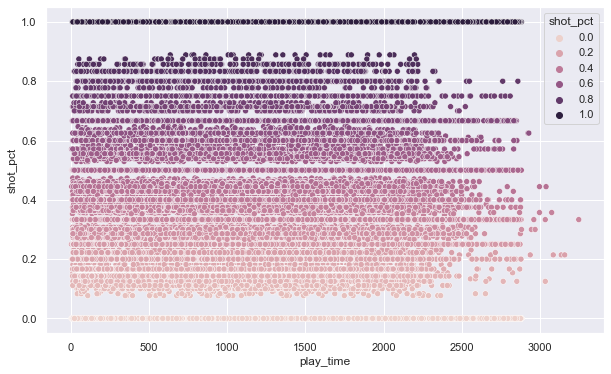

In [37]:
X= new_df[["play_time","shot_pct"]]
# def cluster_features(df, k):
kmeans = KMeans(n_clusters =4, random_state=347)

#group1 = train_scaled[['age','price_bath','taxvaluedollarcnt_zone','taxvaluedollarcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet','price_sqft']]
kmeans.fit(X)
kmeans.predict(X)
# train_scaled['shot_clusters'] = kmeans.predict(X)
plt.figure(figsize=(10, 6))
# plt.axvline(x=0.5, color='k', linestyle='--')
sns.scatterplot(x = 'play_time', y = 'shot_pct', data = new_df, hue = 'shot_pct')